## Import Libraries..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Read data from csv file..

In [2]:
my_data = pd.read_csv('Iris.csv')

In [3]:
iris_data = pd.DataFrame(my_data)
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data.shape

(150, 6)

In [7]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Data Cleaning..

In [8]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

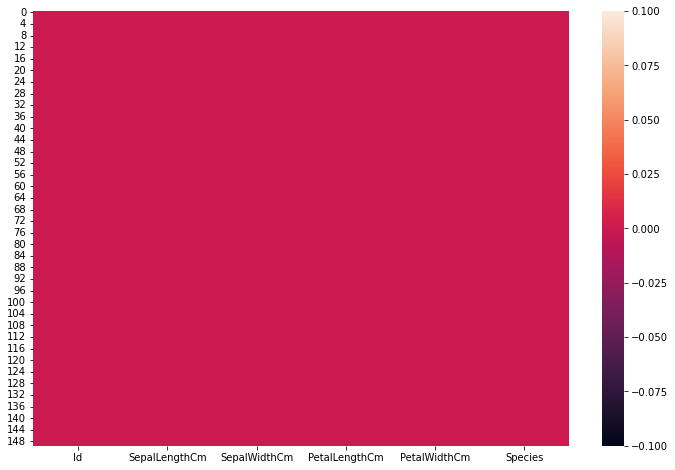

In [9]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(iris_data.isnull())
plt.show()

In [10]:
iris_data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


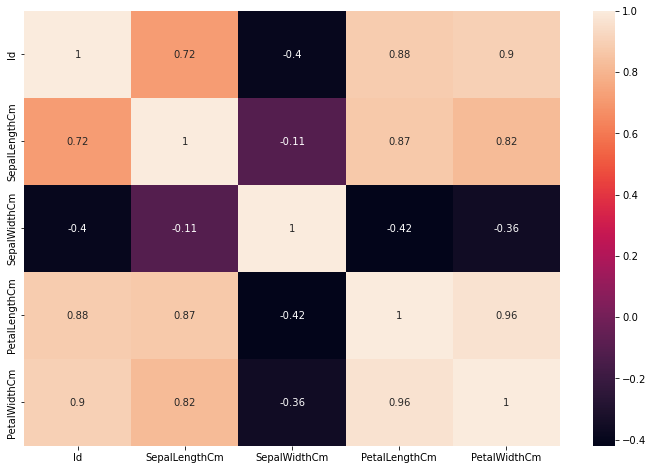

In [11]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(iris_data.corr(), annot = True)
plt.show()

In [12]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
iris_data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [14]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris_data = iris_data.drop('Id', axis = 1)

In [17]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
iris_data['Species'] = iris_data['Species'].replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

In [20]:
iris_data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [21]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
iris_data['Species'].unique()

array([0, 1, 2], dtype=int64)

In [23]:
iris_data['Species'] = iris_data['Species'].astype('category').cat.codes

## Exploratory Data Analysis (EDA)..

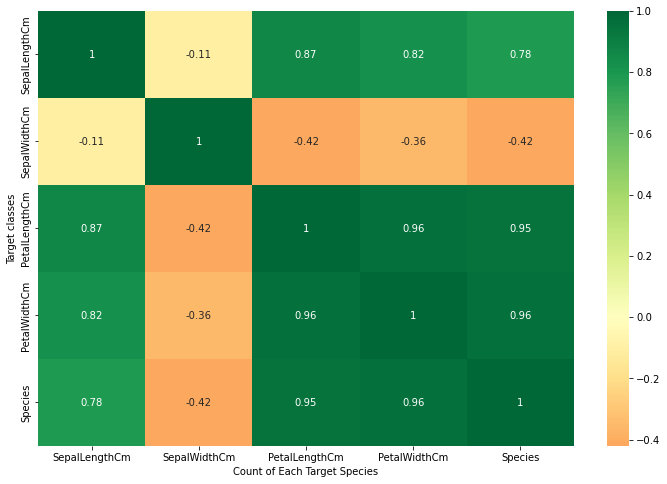

In [24]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(iris_data.corr(), annot = True, cmap = 'RdYlGn', center = 0)
plt.ylabel('Target classes')
plt.xlabel('Count of Each Target Species')
plt.show()

In [25]:
X = iris_data.drop('Species', axis = 1)
y = iris_data['Species']

## Split data into train and test..

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## Create object of Standard Scaler..

In [28]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Create Decision Tree Classifier Model..

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
tree_model = DecisionTreeClassifier(criterion = 'gini')

In [31]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = tree_model.predict(x_test)

In [33]:
print(confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Find accuracy of model: 96.6667 %..

In [35]:
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score * 100, '%')

Accuracy: 96.66666666666667 %


## Check actual and predicted value of model..

In [36]:
submission = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
submission

,Actual,Predicted
72,1,1
112,2,2
132,2,2
88,1,1
37,0,0
138,2,2
87,1,1
42,0,0
8,0,0
90,1,1


# THE END..!!